<a href="https://colab.research.google.com/github/scottthomaswx/GoesPlotting/blob/main/Goes2Go.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Needed Packages

In [ ]:
# @title
!pip install proj --quiet
!pip install geos --quiet
!pip install cartopy --quiet
!pip install metpy --quiet
!pip install goes2go --quiet
!pip install netCDF4 --quiet
!pip install matplotlib --quiet
!pip install xarray --quiet
!pip install numpy --quiet

In [ ]:
from goes2go import GOES
import proj
import cartopy
import metpy
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from metpy.plots import colortables
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
!mkdir sat_data
!mkdir VisImages
!mkdir IRImages
!mkdir ULWVImages
!mkdir MLWVImages
!mkdir LLWVImages

mkdir: cannot create directory ‘sat_data’: File exists
mkdir: cannot create directory ‘VisImages’: File exists
mkdir: cannot create directory ‘IRImages’: File exists
mkdir: cannot create directory ‘ULWVImages’: File exists
mkdir: cannot create directory ‘MLWVImages’: File exists
mkdir: cannot create directory ‘LLWVImages’: File exists


#Create Satellite Object and Get Data

[Product Link](https://github.com/blaylockbk/goes2go/blob/main/goes2go/product_table.txt)

In [ ]:
GCONUS = GOES(satellite=16, product="ABI-L1b-RadC", domain='C')
GMESO = GOES(satellite=16, product="ABI-L1b-RadC", domain='M')

In [ ]:
df = GCONUS.df(start='2023-08-24 21:00', end='2023-08-25 03:00')
df

,file,product_mode,satellite,start,end,creation,product,mode_bands,mode,band
0,noaa-goes16/ABI-L1b-RadC/2023/236/21/OR_ABI-L1...,ABI-L1b-RadC-M6C01,G16,2023-08-24 21:01:17.100,2023-08-24 21:03:54.400,2023-08-24 21:03:57.800,ABI-L1b-RadC,M6C01,6,1
1,noaa-goes16/ABI-L1b-RadC/2023/236/21/OR_ABI-L1...,ABI-L1b-RadC-M6C01,G16,2023-08-24 21:06:17.100,2023-08-24 21:08:54.500,2023-08-24 21:08:58.000,ABI-L1b-RadC,M6C01,6,1
2,noaa-goes16/ABI-L1b-RadC/2023/236/21/OR_ABI-L1...,ABI-L1b-RadC-M6C01,G16,2023-08-24 21:11:17.100,2023-08-24 21:13:54.400,2023-08-24 21:13:57.800,ABI-L1b-RadC,M6C01,6,1
3,noaa-goes16/ABI-L1b-RadC/2023/236/21/OR_ABI-L1...,ABI-L1b-RadC-M6C01,G16,2023-08-24 21:16:17.100,2023-08-24 21:18:54.400,2023-08-24 21:18:58.300,ABI-L1b-RadC,M6C01,6,1
4,noaa-goes16/ABI-L1b-RadC/2023/236/21/OR_ABI-L1...,ABI-L1b-RadC-M6C01,G16,2023-08-24 21:21:17.100,2023-08-24 21:23:54.400,2023-08-24 21:23:58.500,ABI-L1b-RadC,M6C01,6,1
...,...,...,...,...,...,...,...,...,...,...
1147,noaa-goes16/ABI-L1b-RadC/2023/237/02/OR_ABI-L1...,ABI-L1b-RadC-M6C16,G16,2023-08-25 02:36:17.100,2023-08-25 02:38:55.700,2023-08-25 02:39:03.200,ABI-L1b-RadC,M6C16,6,16
1148,noaa-goes16/ABI-L1b-RadC/2023/237/02/OR_ABI-L1...,ABI-L1b-RadC-M6C16,G16,2023-08-25 02:41:17.100,2023-08-25 02:43:55.600,2023-08-25 02:44:03.600,ABI-L1b-RadC,M6C16,6,16
1149,noaa-goes16/ABI-L1b-RadC/2023/237/02/OR_ABI-L1...,ABI-L1b-RadC-M6C16,G16,2023-08-25 02:46:17.100,2023-08-25 02:48:55.500,2023-08-25 02:49:03.000,ABI-L1b-RadC,M6C16,6,16
1150,noaa-goes16/ABI-L1b-RadC/2023/237/02/OR_ABI-L1...,ABI-L1b-RadC-M6C16,G16,2023-08-25 02:51:17.100,2023-08-25 02:53:55.700,2023-08-25 02:54:02.800,ABI-L1b-RadC,M6C16,6,16


In [ ]:
#ds = G.nearesttime('2022-01-01')
#ds = G.latest()
#G.timerange(recent='30min')

In [ ]:
%%capture
SAT = GCONUS.timerange(start='2023-08-24 22:00', end='2023-08-25 02:00', save_dir = '/content/sat_data' )

In [ ]:
VIS = SAT.query('band == 2')
VIS = VIS.reset_index(drop = True)
ULWV = SAT.query('band == 8')
ULWV = ULWV.reset_index(drop = True)
MLWV = SAT.query('band == 9')
MLWV = MLWV.reset_index(drop = True)
LLWV = SAT.query('band == 10')
LLWV = LLWV.reset_index(drop = True)
IR = SAT.query('band == 13')
IR = IR.reset_index(drop = True)

In [ ]:
i=0
while i < len(VIS.file) :
  data = xr.open_dataset(f"/content/sat_data/{VIS['file'][i]}")

  C02 = data['Rad']
  gamma = 2.2
  C02 = np.power(C02, 1/gamma)

  dat = data.metpy.parse_cf('Rad')

  geos = dat.metpy.cartopy_crs

  x = dat.x
  y = dat.y

  fig = plt.figure(figsize=(15, 12), edgecolor = 'black', linewidth = 6)
  pc = ccrs.PlateCarree()

  ax1 = fig.add_subplot(1, 1, 1, projection=pc)
  ax1.set_extent([-90, -80, 40, 48], crs=ccrs.PlateCarree())
  ax1.imshow(C02, cmap='gray', transform=geos)
  ax1.coastlines(resolution='50m', color='red', linewidth=1)
  ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=1, edgecolor = 'red')
  plt.title('GOES-16 Visible', loc='left', fontweight='bold', fontsize=15)
  plt.title(f'{data.time_coverage_start.split(".")[0]} UTC', loc='right')
  plt.savefig(f'./VisImages/C02_{data.time_coverage_start.split(".")[0]}.png', bbox_inches='tight')
  print(f'Visible Satelite Imagery Valid {data.time_coverage_start.split(".")[0]} UTC Completed')
  i+=1

IR Satelite Imagery Valid 2023-08-24T22:01:17 UTC Completed


KeyboardInterrupt: 

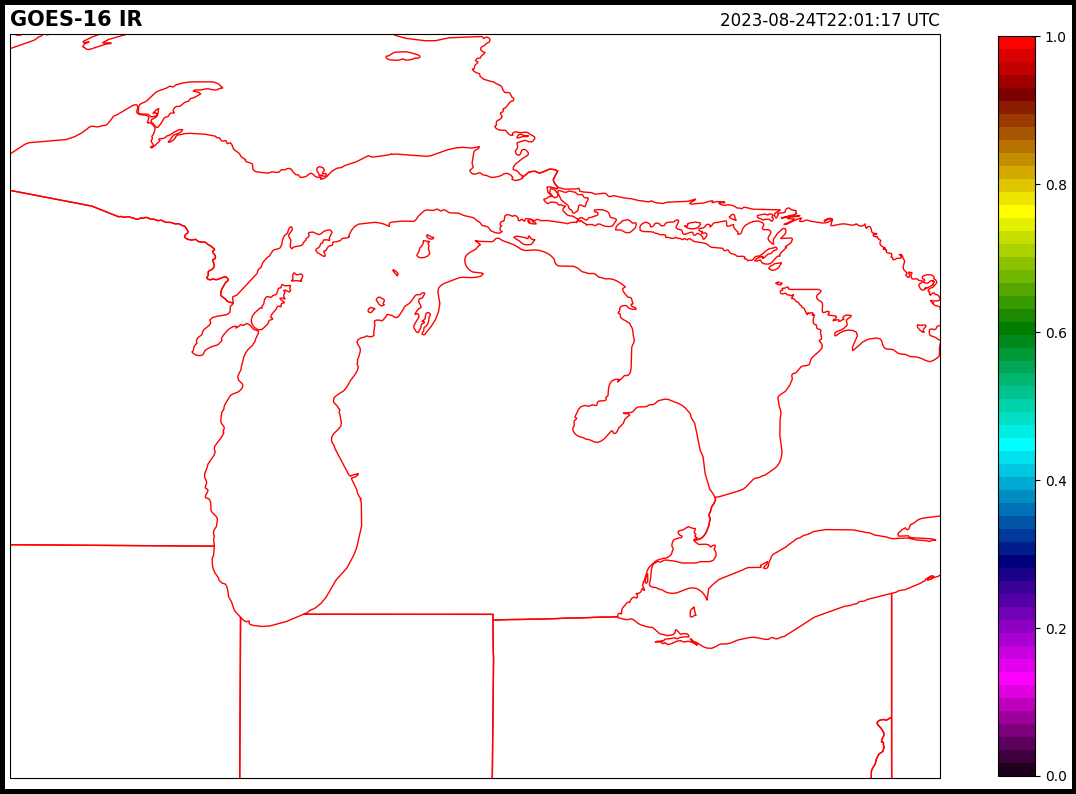

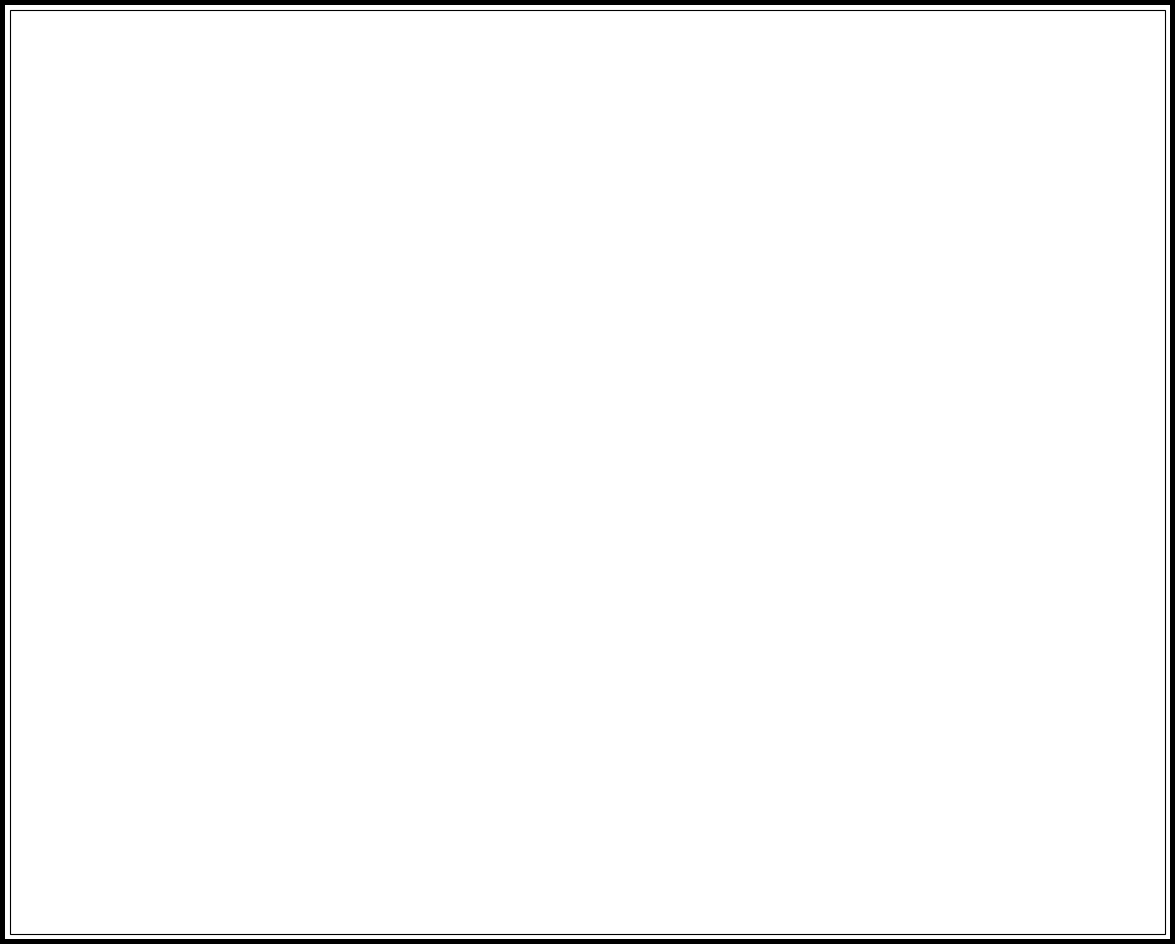

In [ ]:
i=0
while i < len(IR.file) :
  data = xr.open_dataset(f"/content/sat_data/{IR['file'][i]}")

  C13 = data['Rad']

  fk1 = data['planck_fk1'].values
  fk2 = data['planck_fk2'].values
  bc1 = data['planck_bc1'].values
  bc2 = data['planck_bc2'].values

  T = [ fk2 / (np.log(( fk1 / C13) + 1)) - bc1 ] / bc2

  T-= 273.15

  dat = data.metpy.parse_cf('Rad')

  geos = dat.metpy.cartopy_crs

  x = dat.x
  y = dat.y

  fig = plt.figure(figsize=(15, 12), edgecolor = 'black', linewidth = 6)
  pc = ccrs.PlateCarree()

  ax1 = fig.add_subplot(1, 1, 1, projection=pc)
  ax1.set_extent([-90, -80, 40, 48], crs=ccrs.PlateCarree())
  ir_table = colortables.get_colortable('ir_rgbv')
  sat = ax1.imshow(T, cmap=ir_table, transform=geos)
  ax1.coastlines(resolution='50m', color='red', linewidth=1)
  ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=1, edgecolor = 'red')
  plt.title('GOES-16 IR', loc='left', fontweight='bold', fontsize=15)
  plt.title(f'{data.time_coverage_start.split(".")[0]} UTC', loc='right')
  plt.colorbar(sat, shrink = 0.8)
  plt.savefig(f'./IRImages/C13_{data.time_coverage_start.split(".")[0]}.png', bbox_inches='tight')
  print(f'IR Satelite Imagery Valid {data.time_coverage_start.split(".")[0]} UTC Completed')
  i+=1

In [ ]:
data = xr.open_dataset(f"/content/sat_data/{IR['file'][0]}")

C13 = data['Rad']

fk1 = data['planck_fk1'].values
fk2 = data['planck_fk2'].values
bc1 = data['planck_bc1'].values
bc2 = data['planck_bc2'].values

T = [ fk2 / (np.log(( fk1 / C13) + 1)) - bc1 ] / bc2

T-= 273.15

data_new = data.assign(BT = (tuple(C13.coords(x,y)), T))

dat = data.metpy.parse_cf('Rad')

geos = dat.metpy.cartopy_crs

x = dat.x
y = dat.y

fig = plt.figure(figsize=(15, 12), edgecolor = 'black', linewidth = 6)
pc = ccrs.PlateCarree()

ax1 = fig.add_subplot(1, 1, 1, projection=pc)
ax1.set_extent([-90, -80, 40, 48], crs=ccrs.PlateCarree())
ir_table = colortables.get_colortable('ir_rgbv')
sat = ax1.imshow(T, cmap=ir_table, vmin = -60, vmax = 80, transform=geos)
ax1.coastlines(resolution='50m', color='red', linewidth=1)
ax1.add_feature(ccrs.cartopy.feature.STATES, linewidth=1, edgecolor = 'red')
plt.title('GOES-16 IR', loc='left', fontweight='bold', fontsize=15)
plt.title(f'{data.time_coverage_start.split(".")[0]} UTC', loc='right')
plt.colorbar(sat, shrink = 0.8)
plt.savefig(f'./IRImages/C13_{data.time_coverage_start.split(".")[0]}.png', bbox_inches='tight')
print(f'IR Satelite Imagery Valid {data.time_coverage_start.split(".")[0]} UTC Completed')

TypeError: 'DataArrayCoordinates' object is not callable